1. Don't submit PDFs or blank notebooks for your homework.
2. Run "reset and clear" before submitting the homework to make sure none of the asserts fail.
3. You'll get a feedback email explaining the points you missed.

# Data Visualization II

- tools:
    - `matplotlib`
    - `seaborn`
- plotting
    - quantitative data
    - categorical data
- customizing visualizations

<div class="alert alert-success">
The examples and data in this notebook are largely adapted from two places: (1) Jake VanderPlas' <a href="https://github.com/jakevdp/PythonDataScienceHandbook" class="alert-link">Python Data Science Handbook</a> and (2) Berkeley's <a href="https://www.textbook.ds100.org/ch/06/viz_intro.html" class="alert-link">Data 100 Textbook</a> (your TA, Sam, is an author on that book!!!). Feel free to check out these resources for more!
</div>

A good data visualization can help you:
- identify anomalies in your data
- better understand your own data
- communicate your findings


# Getting Started

First we'll import the libraries we'll use for plotting. 

In [2]:
# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(font_scale=2)

# import matplotlib
import matplotlib.pyplot as plt # Typical way of import MPL
import matplotlib as mpl # This line is used less frequently

# set plotting size parameter
plt.rcParams['figure.figsize'] = (17, 7)

# import pandas library
import pandas as pd

# import numpy
import numpy as np


Note specifically the `sns.set()` line. There we're increasing the font size on plots so that it's large enough to view on slides when projected. Multiple settings can be specified within that function.

We've also specified the default size for plots throughout this notebook with the `plt.rcParams` line above.

# The Data
With the libraries we need imported, now let's get the data we'll use for today's examples directly from the `seaborn` [plotting library](http://seaborn.pydata.org/). 

In [14]:
# Load the dataset to make plot function calls simpler
ti = sns.load_dataset('titanic')

# We'll take a look at the first few rows
ti.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [15]:
ti.shape

(891, 15)

In [18]:
# Load the dataset and drop N/A values 
# to make plot function calls simpler
ti = sns.load_dataset('titanic').dropna().reset_index(drop=True)

# We'll take a look at the first few rows
ti.shape

(182, 15)

This dataset includes 182 observations (rows) and 15 variables (columns).

In [19]:
ti.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
1,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
2,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
3,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
4,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


1. From just looking at the column names and values, what are some questions that we have about the dataset that we may need further clarification on?
2. Assuming the column names mean what you think, what are some interesting questions we can ask using this dataset?

# What does the actual DATA look like?! Histograms can be used to visualize this. 

__Histograms__ are helpful for visualizing information about a _single quantitative variable_.

To get started, we'll visualize the ages of the passengers using a histogram.

We can use seaborn's `distplot` function.

/Users/christopherkeown/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


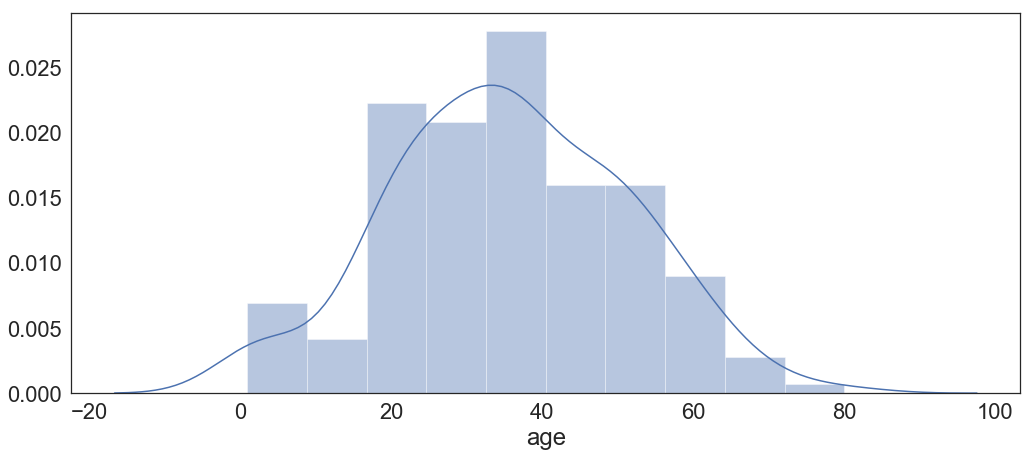

In [79]:
# generate histogram
sns.distplot(ti['age'])

From this visualization we get an idea of the _distribution_ of passengers' ages. We can quickly discern that the range of values is between 0 and 80 years and that the median (middle value) is right around 38-40 years.

This is a nice plot that gives us a clear idea of the age distribution as the histogram (the rectangles) and the density (smooth line) are plotted..._but_, more information can be displayed here. 

## Histogram + Rugplot

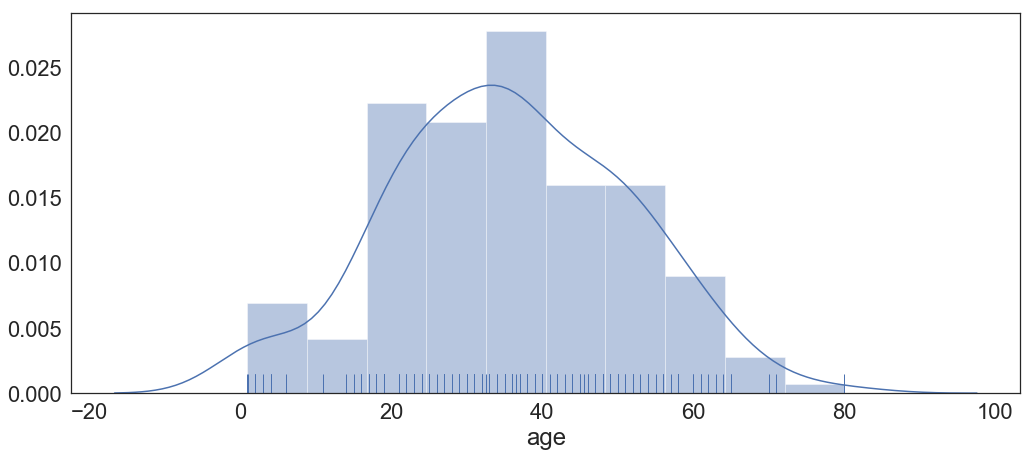

In [80]:
# add rugplot
sns.distplot(ti['age'], rug=True);

Notice the short vertical lines at the bottom. Each line represents a different passenger's age.

## Histogram Bin Size

One final thing to note about histograms is the fact that the number of  bins displayed plays a large role what the viewer takes away from the visualization.

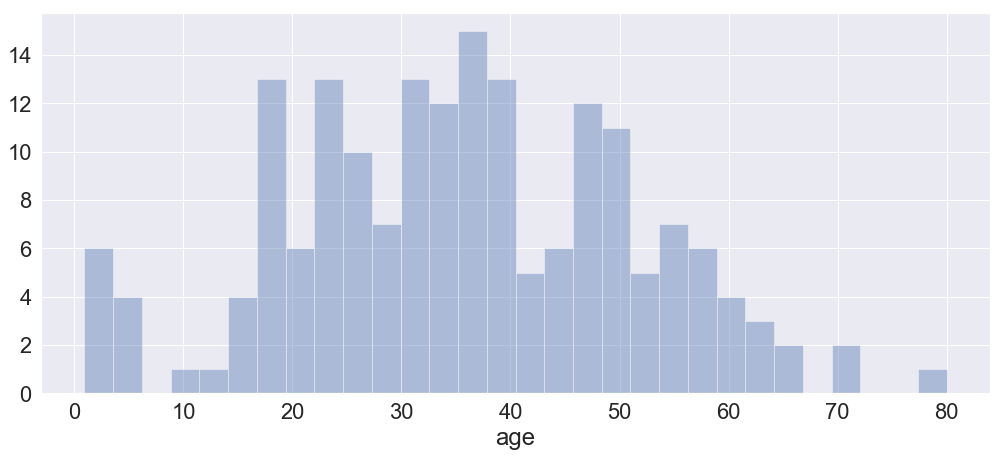

In [25]:
# adjust bin size
sns.distplot(ti['age'], kde=False, bins=30);


With more bins here, the general shape doesn't change much but we get a finer-tuned level of information.

## Less is more

In lecture you learned that less is more when it comes to visualization. So, we should probably get rid of this background color now and remove the gridlines. We'll use the _less is more_ approach as we work through the other types of visualizations.

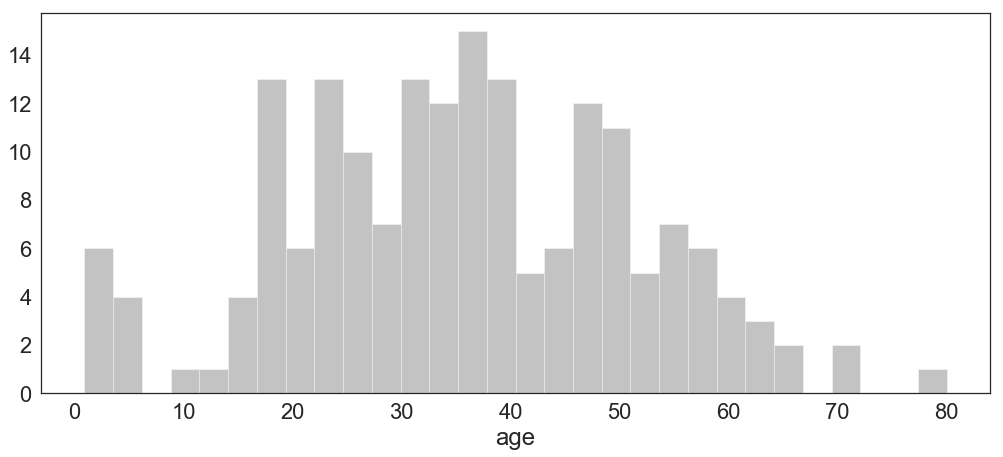

In [28]:
# change style for this plot and all plots going forward
sns.set_style("white")
# same plot as above; different style
# and different color bars

sns.distplot(ti['age'], kde=False, bins=30, color = 'dimgrey')

Much better! 

## Despine

Let's remove the top and right lines of the plot, as they're serving no function

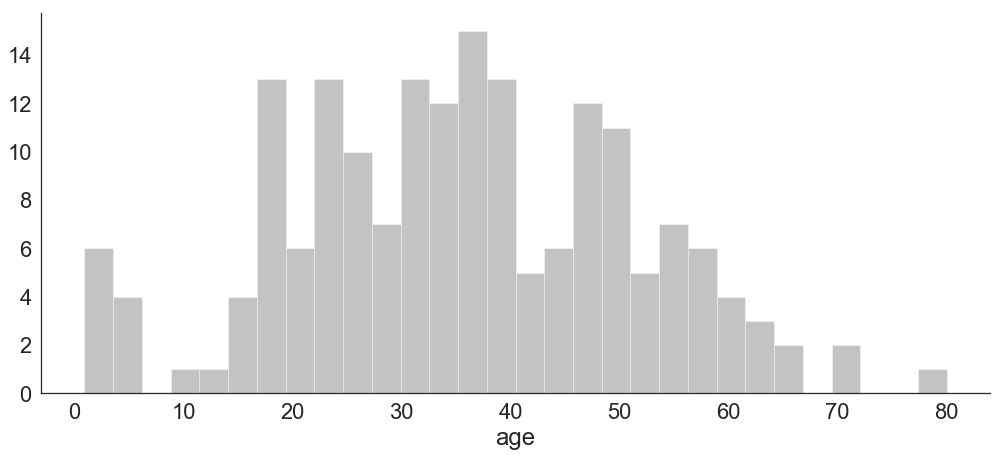

In [29]:
sns.distplot(ti['age'], kde=False, bins=30, color = 'dimgrey')
# remove top and right lines around plot
sns.despine()

# Boxplots

With a handle on histograms, let's look at boxplots, which, as we've discussed previosly display where most of the data lie for a given set of numbers. 

By default, the box delineates the 25th and 75th percentile. The line down the middle represents the median. "Whiskers" extend to show the range for the rest of the data, excluding outliers. Outliers are marked as individual points outside of the whiskers.

![Boxplot Skewness](boxplot_skewness.png)

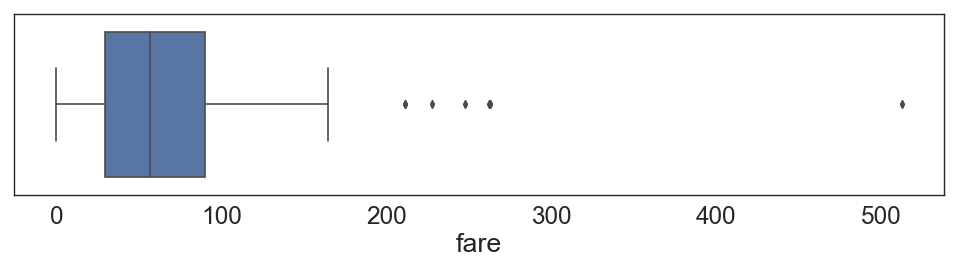

In [76]:
# You can always specify the size of a figure within a cell
# if you want it to be different than the default
fig=plt.figure(figsize=(15, 3), dpi= 80, facecolor='w', edgecolor='k')

# generate boxplot
sns.boxplot(x='fare', data=ti);

Here, we quickly see that typical fares were less than \\$100. However, there were five pricey fares (>\\$200), as denoted by the outliers.

## Outlier determination

In [77]:
# determine the 25th and 75th percentiles
lower, upper = np.percentile(ti['fare'], [25, 75])
lower, upper

(29.7, 90.0)

In [78]:
# calculate IQR
iqr = upper - lower
iqr

60.3

Typically, the inter-quartile range (IQR) is used to determine which values get marked as outliers. The IQR is: 75th percentile - 25th percentile. Values greater than 1.5 x IQR above the 75th or below the 25th percentile are marked as outliers.  

In [41]:
# calculate lower cutoff
# values below this are outliers 
lower_cutoff = lower - 1.5 * iqr

# calculate upper cutoff
# values above this are outliers 
upper_cutoff = upper + 1.5 * iqr

lower_cutoff, upper_cutoff

(-60.749999999999986, 180.45)

# Boxplot (by a separate categorical variable)

Histograms show the whole distribution at once, so while we've shown that you _can_ make a boxplot to look at a single numeric variable, usually you should just make a histogram instead, as you'll get more information.

Boxplots really shine when you want to look at the range of typical values for a quantitative variable, _broken down by a separate categorical variable_.

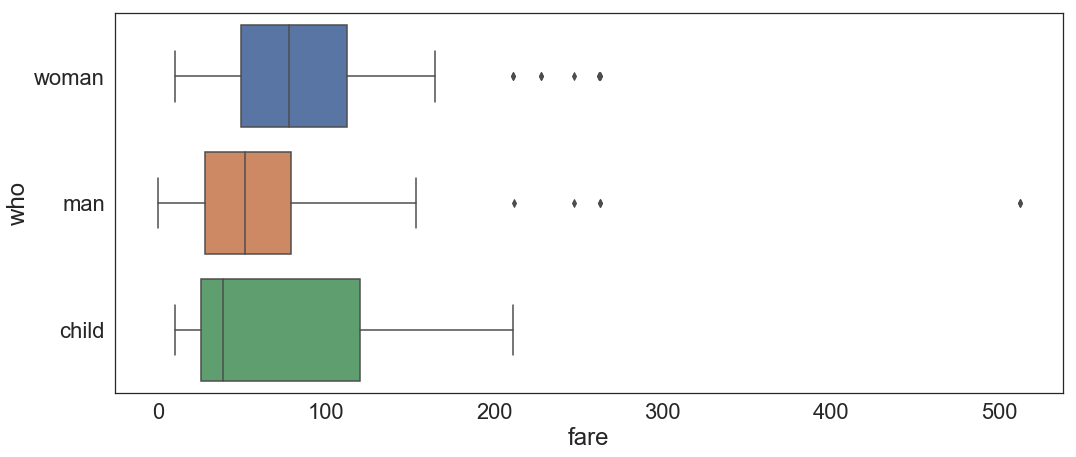

In [42]:
# Generate fare boxplot broken down by group
sns.boxplot(x='fare', y='who', data=ti);


# Histograms (by a categorical variable)

The same data plotted as a histogram are not so easily interpretable.

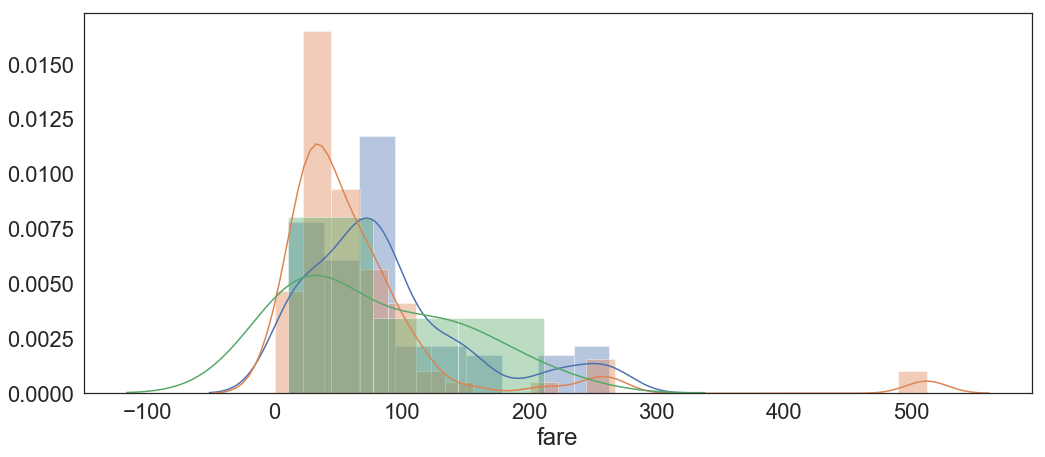

In [43]:
sns.distplot(ti.loc[ti['who'] == 'woman', 'fare'])
sns.distplot(ti.loc[ti['who'] == 'man', 'fare'])
sns.distplot(ti.loc[ti['who'] == 'child', 'fare']);

To summarize:
- __histogram__: single quantitative variable
- __boxplot__: single quantititave variable broken down by categorical variable

# Scatter Plots

So far we've looked at a single quantitative variable (histogram), a quantitative and a categorical variable (boxplot), what if you have __two quantitative variables__? 

Scatter plots will be your go to for this.

We'll continue to look at the same two quantitative variables we looked at previously: `age` and `fare` to start to better understand the relationship between them.

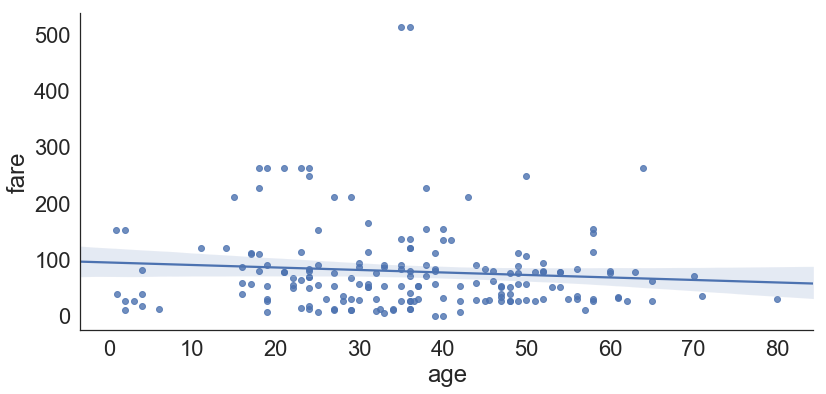

In [44]:
# generate scatterplot
sns.lmplot(x='age', y='fare', data=ti, height=6, aspect=2);


By default, a regression line will be fit to the data (we'll talk about this in lecture soon)! 

What we can determine is that the points don't really fall very close to that line, so let's turn that off.

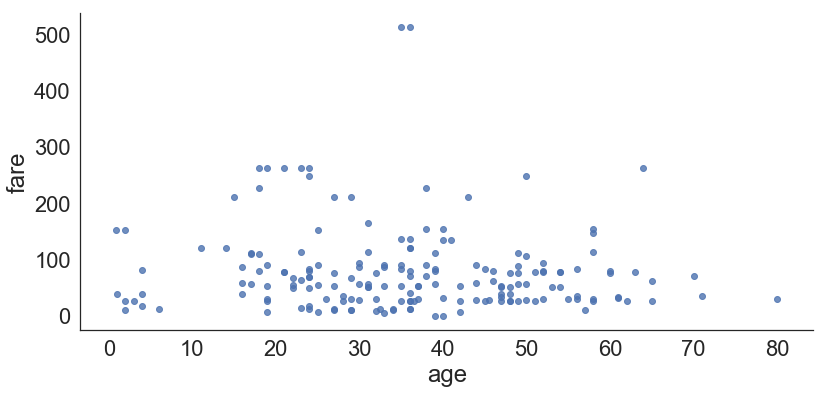

In [45]:
# remove regression line
sns.lmplot(x='age', y='fare', data=ti, fit_reg=False, height=6, aspect=2);


We can conclude a few things from looking at this plot:
    - age does not determine how much one paid for their ticket
    - those with the most expensive tickens were around 37 years old

## Scatterplots (by a categorical variable)

When you want to plot two numeric variables but want to get some insight about a *third* categorical variable, you can color the points on the plot by the categorical variable.

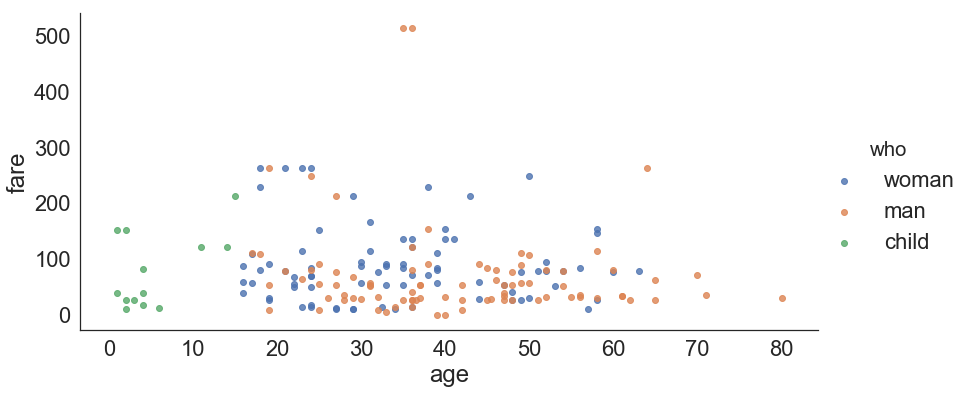

In [46]:
# color points by who the passenger is
sns.lmplot(x='age', y='fare', hue='who', data=ti, fit_reg=False, height=6, aspect=2);

We don't get a _ton_ more information here, but what we do now know that the oldest passengers were men and those tickets purchased at the highest fare, also men.

# Bar Chart

Now that we've discussed how to approach plotting of quantitative variables, let's pivot and focus on categorical data for a bit.

In `seaborn` there are two types of bar charts:
1. `countplot` - counts the number of times each category appears in a column
2. `barplot` - groups dataframe by a categorical column and plots the height bars according to the average of a numerical column within each group

## Barchart: Countplot

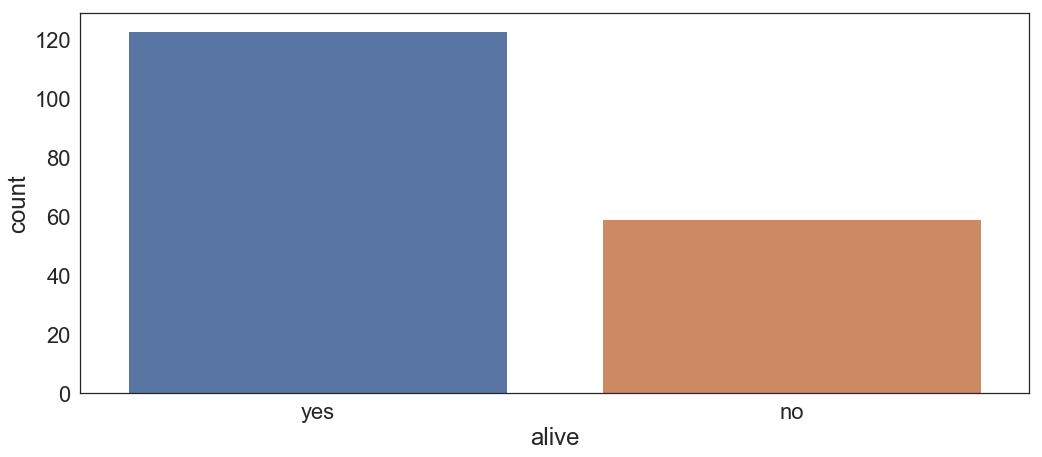

In [47]:
# Count # of passengers survived & # who didn't 
# draws bars with corresponding values plotted
sns.countplot(x='alive', data=ti);

## Barchart: countplot (two categorical variables)

You can also see how the values break down among two categorical variables

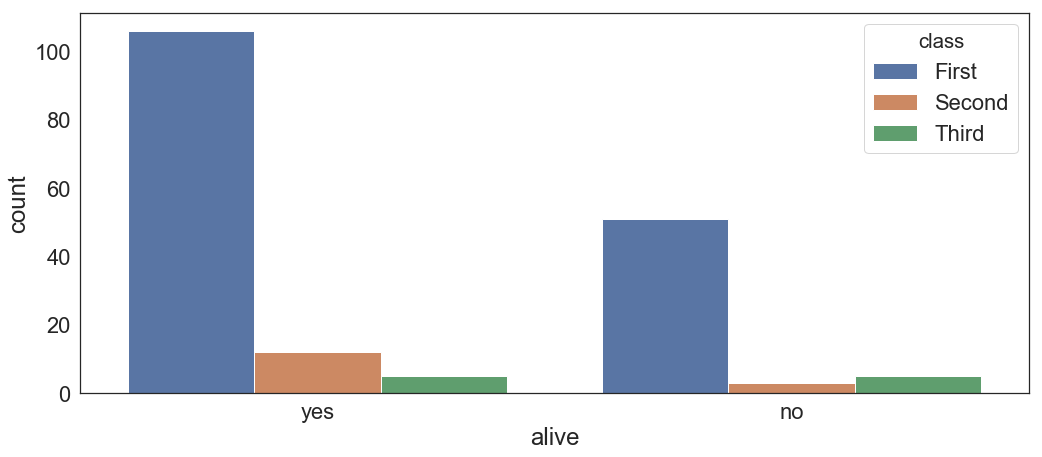

In [48]:
# Specify second variable with `hue`
sns.countplot(x='alive', hue='class', data=ti);

## Barchart: Barplot

When you have one categorical and one quantitative variable, you'll use `barplot` instead.

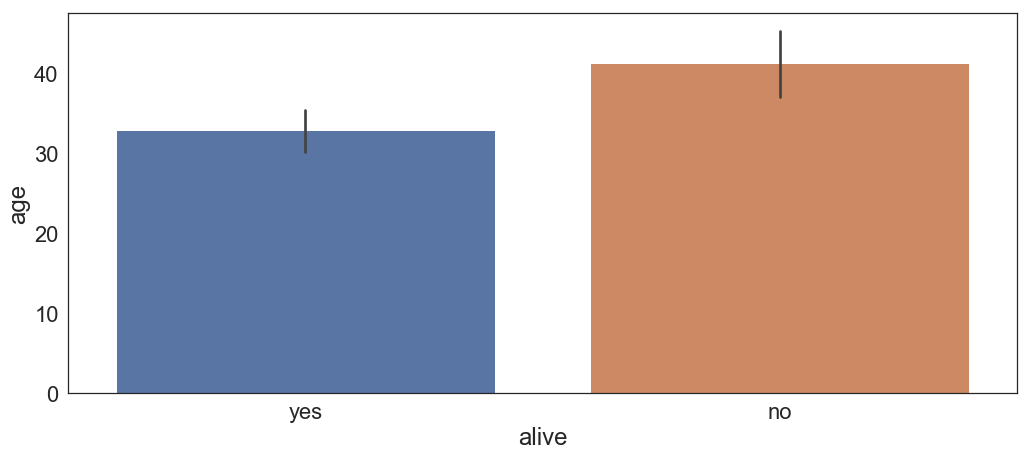

In [51]:
# categorical alive/not alive passengers
# compute and plot the average age within `alive`.
sns.barplot(x='alive', y='age', data=ti)

To see where these values came from, we'd just have to group the data and calculate the mean.

In [52]:
## calculate the mean within alive
ti[['alive', 'age']].groupby('alive').mean()

,age
alive,
no,41.288136
yes,32.905854


For completeness' sake, those black lines at the top of each bar are the _95% confidence intervals_ for each averaged value. 

These represent that in a random sample of passengers on the titanic, you could reasonably expect the mean number of passengers to survive would fall between the black line on the "yes" bar in the plot we just generated and the mean numver of passengers to not survive would fall between the black lines on the "no" bar.

The black bars can be turned off (which is a good idea if your dataset is very large and this information is not important to you.)

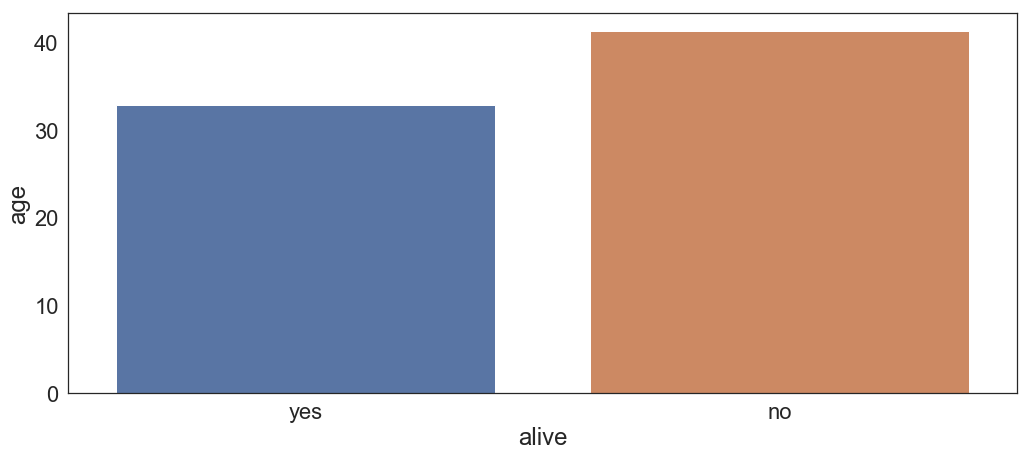

In [53]:
# turn off 95% CI bars
sns.barplot(x='alive', y='age', data=ti, ci=False);

# Customization: `matplotlib`

So far we've used `seaborn` which is great for quickly making lots of different plots. However, if you want to really have fine-tune control over your final plot, you'll need to use `matplotlib`

In `matplotlib` the process involves the following:
1. Create the figure
2. Add axes to the figure

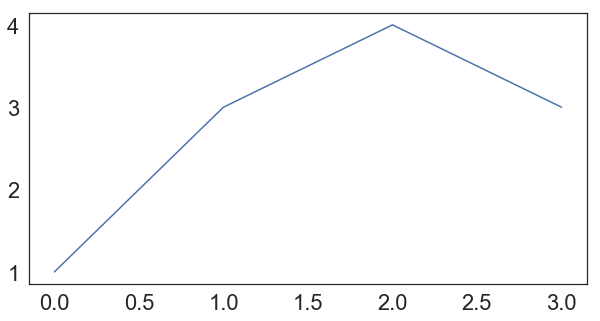

In [82]:
# Create a figure
f = plt.figure(figsize=(10, 5))

# Add an axes to the figure. 
# The first and second arguments create a 1x1 table
# The third argument places the axes in the first
# cell of the table.
ax = f.add_subplot(1, 1, 1) # nrows, ncolumns, index

# Create a line plot on the axes
ax.plot([0, 1, 2, 3], [1, 3, 4, 3])

# Show the plot.
# In Jupyter notebook you don't need this
# It will show up
plt.show()

# Line Plots

We'll demonstrate how to customize a plot in `matplotlib` with a line plot. 

Here we're plotting two quantitiative variables on a single plot.

In [55]:
# generate some data
x = np.arange(0, 10, 0.1)

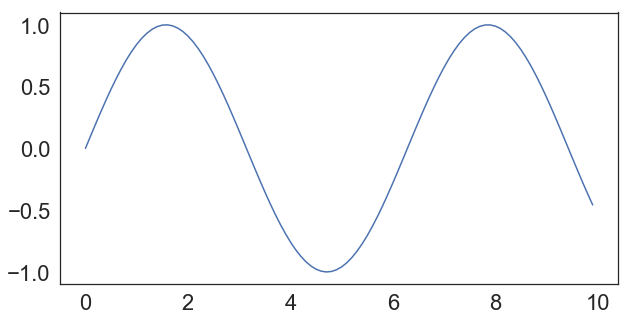

In [56]:
# generate line plot
f = plt.figure(figsize=(10, 5))
ax = f.add_subplot(1, 1, 1)

ax.plot(x, np.sin(x), label='sin(x)')

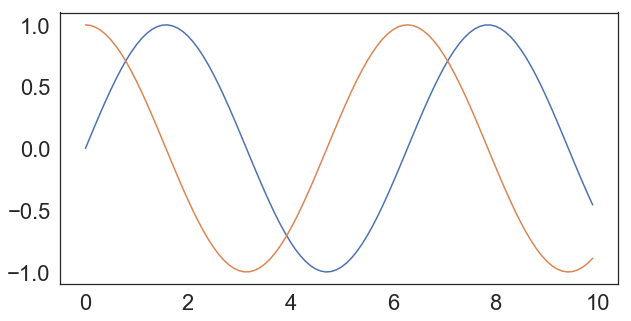

In [57]:
f = plt.figure(figsize=(10, 5))
ax = f.add_subplot(1, 1, 1)

# plot more than one thing 
ax.plot(x, np.sin(x), label='sin(x)')
ax.plot(x, np.cos(x), label='cos(x)')

Note that `matplotlib` automatically chooses a different color for the second line. 

We can continue to build off of this code by adding additional elements, like a _legend_ and _axis labels_:

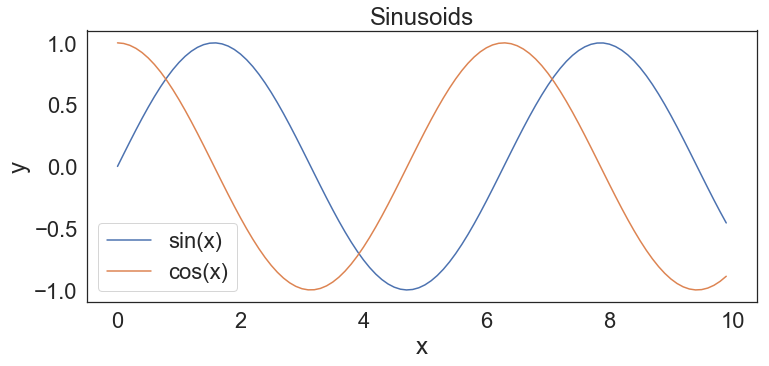

In [58]:
f = plt.figure(figsize=(12, 5))
ax = f.add_subplot(1, 1, 1)

# generate a a legend
ax.plot(x, np.sin(x), label='sin(x)')
ax.plot(x, np.cos(x), label='cos(x)')
ax.legend()

# add title and axis labels
ax.set_title('Sinusoids')
ax.set_xlabel('x')
ax.set_ylabel('y');

## `matplotlib` methods

In addition to `plt`, there are ways to generate a figure that automatically has axes.

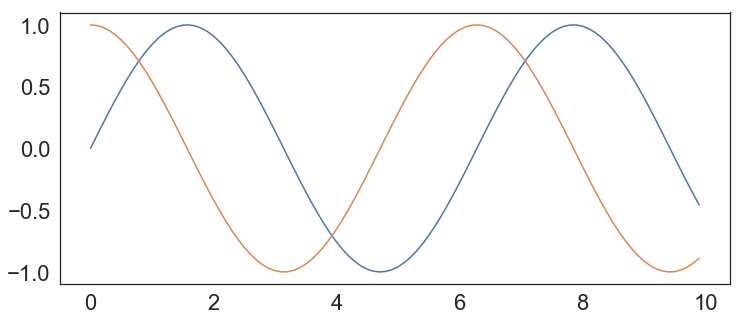

In [59]:
# Shorthand to create figure and axes and call ax.plot
# we can plot more than one thing at a time
f = plt.figure(figsize=(12, 5))

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

This is the same plot we generated above, but in fewer lines of code.

##  Multiple plots in a cell


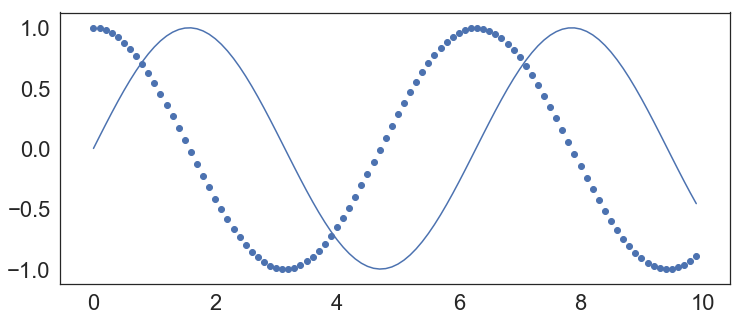

In [60]:
# Same as above
f = plt.figure(figsize=(12, 5))
plt.plot(x, np.sin(x))

# When plt methods are called in the same cell
# existing figure and axes are reused
# adding this to the plot
plt.scatter(x, np.cos(x));

# Customization: Line Color & Style

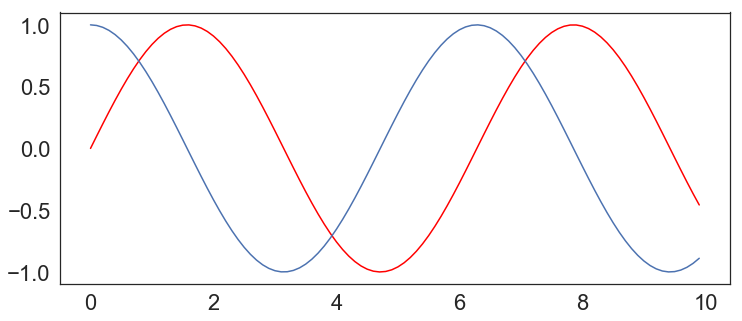

In [61]:
# changing line color
f = plt.figure(figsize=(12, 5))
plt.plot(x, np.sin(x), color = 'red')
plt.plot(x, np.cos(x))

Color can be specified in a number of different ways:
- by name `color = 'red'`
- by short color code, rbgcmyk `color = 'r'`
- grayscale value btween 0 and 1 `color = '0.75'`
- Hex code - RRGGBB `color = '#FFDD44'`
- RGB tuple `color = '1.0,0.2,0.3'`
- HTML color name `color = 'chartreuse'`

## Line Style

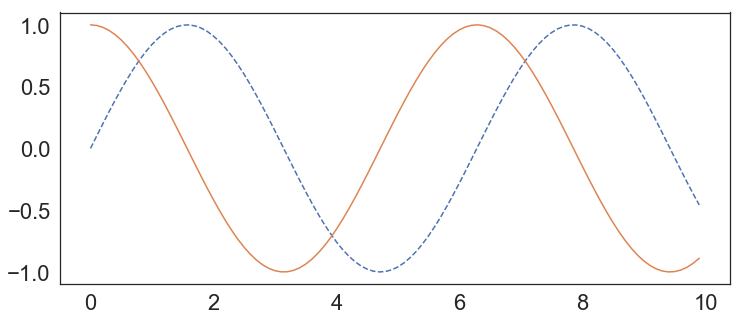

In [62]:
# changing line style
f = plt.figure(figsize=(12, 5))
plt.plot(x, np.sin(x), linestyle='--')
plt.plot(x, np.cos(x))

Linestyle can be specified can be specified in a number of different ways:
- solid : `linestyle = 'solid'` *or* `linestyle = '-'`
- dashed : `linestyle = 'dashed'` *or* `linestyle = '--'`
- dashdot : `linestyle = 'dashdot'` *or* `linestyle = '-.'`
- dotted : `linestyle = 'dotted'` *or* `linestyle = ':'`


## Legend

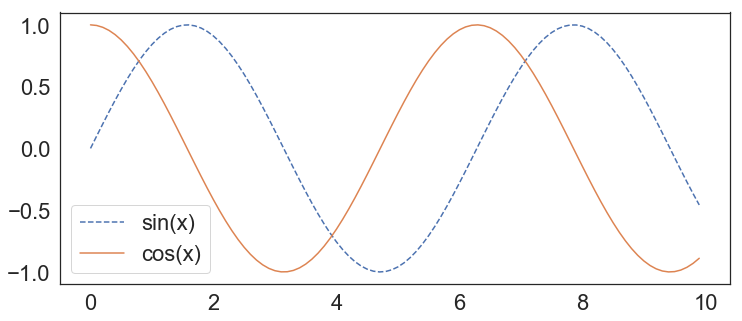

In [83]:
f = plt.figure(figsize=(12, 5))
plt.plot(x, np.sin(x), linestyle='--', label ='sin(x)')
plt.plot(x, np.cos(x), label = 'cos(x)')
# add legend
plt.legend()

# `seaborn` + `matplotlib`

`seaborn` is a great place to get started when generating plots.

And, good news! You can combine `seaborn` plots with `matplotlib` customizations!

Let's return to our Titanic passengers data.

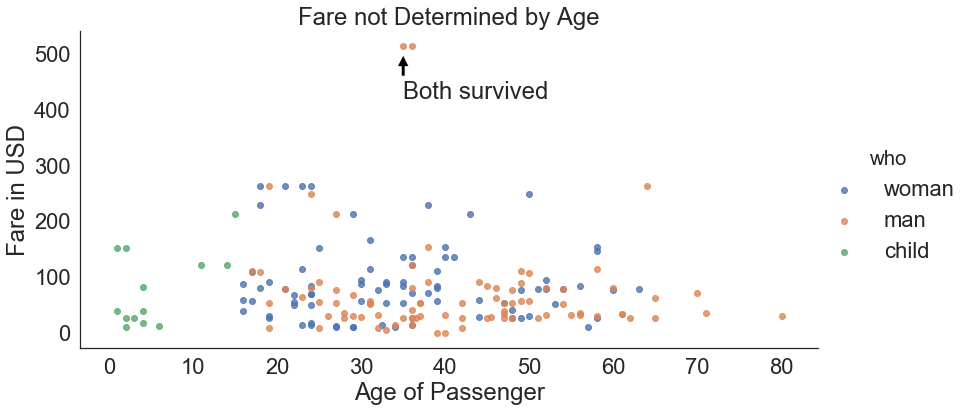

In [64]:
# generate scatterplot
sns.lmplot(x='age', y='fare', hue='who', data=ti, fit_reg=False, height=6, aspect=2)

# customize
plt.title('Fare not Determined by Age')
plt.xlabel('Age of Passenger')
plt.ylabel('Fare in USD')

# add annotation
plt.annotate('Both survived', xy=(35, 500), xytext=(35, 420),
             arrowprops=dict(facecolor='black', shrink=0.05));


At a glance with this plot we can determine _many_ things at once:
- what's plotted on each axis
- the typical values taken for each quantitative variable
- which points represent whom
- that both of the men who spent a whole lot survived

# Customization: Style Sheets

Earlier, we discussed using `sns.set_style()` to change the style of your plots. 

The default style of your plots can _also_ be controlled with _style sheets_. For example, the **FiveThirtyEight style** mimics the graphics on [FiveThirtyEight](https://fivethirtyeight.com/).

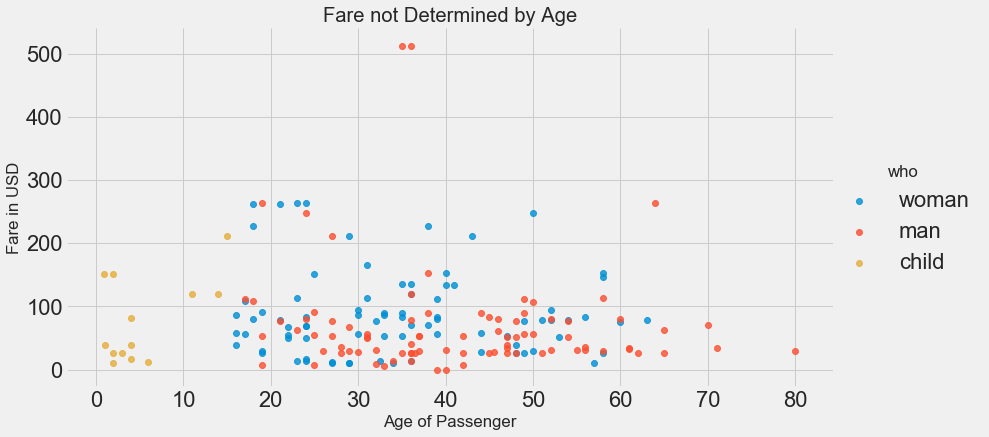

In [68]:
with plt.style.context('fivethirtyeight'):
    # generate scatterplot
    sns.lmplot(x='age', y='fare', hue='who', data=ti, fit_reg=False, height=6, aspect=2)

    # customize
    plt.title('Fare not Determined by Age')
    plt.xlabel('Age of Passenger')
    plt.ylabel('Fare in USD')

You can read more about other styles [here](https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html).

# Customization: `births` data

Now that we're getting the hang of this, let's see how complicated things can get. We'll return to using a line chart to look at birth patterns over time. 

In [70]:
# get the data
births = pd.read_csv('births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


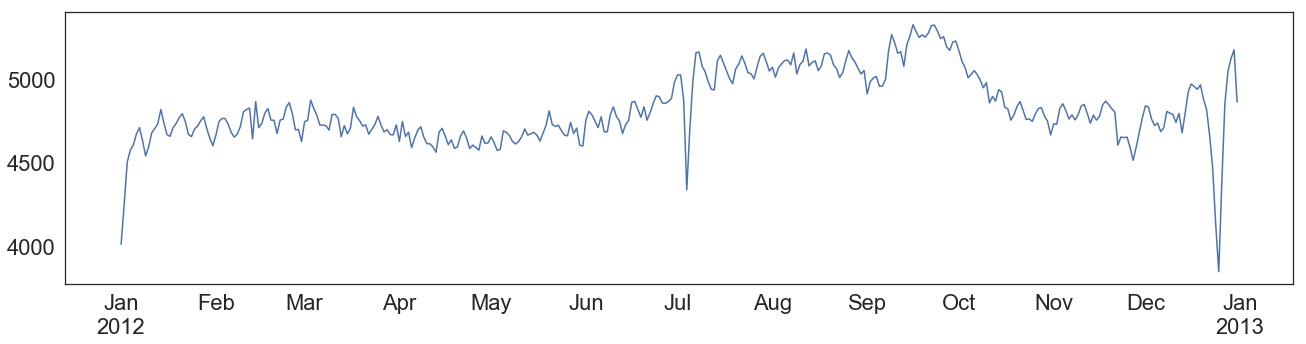

In [84]:
# calculate values & wrangle
quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]


# plot the thing
fig, ax = plt.subplots(figsize=(22, 5))
births_by_date.plot(ax = ax)
ax.get_legend().remove()

What are all those dips? Well, let's annotate the plot to get a better sense of what's going on.

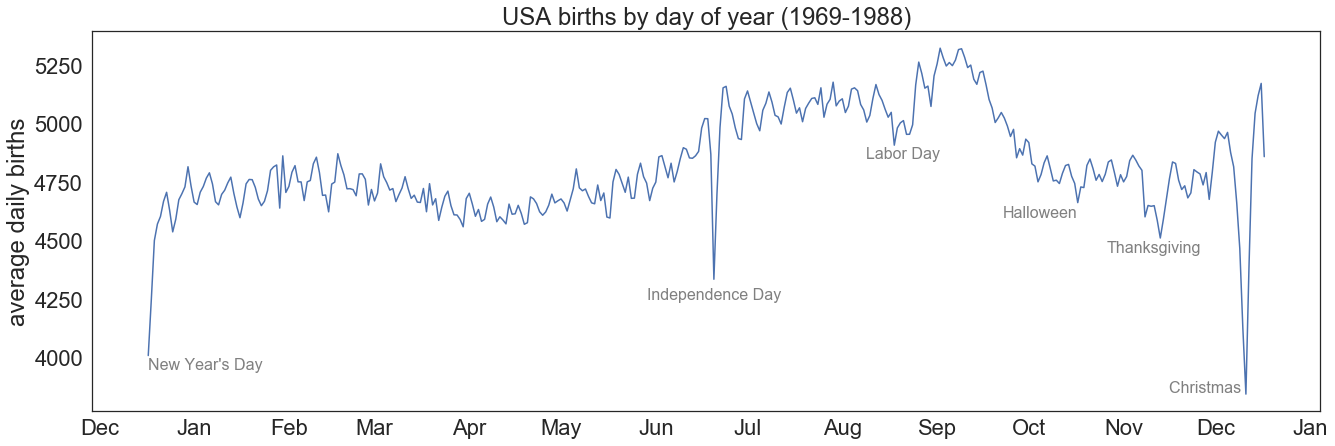

In [72]:
# plot the thing
fig, ax = plt.subplots(figsize=(22, 7))
births_by_date.plot(ax=ax)
ax.get_legend().remove();

# define style
style = dict(size=16, color='gray')

# add annotation
ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

Annotation directly on plots can help explain the plot to viewers.

# Saving Plots

While we're using a Jupyter notebook right now, you won't always be. So, you'll need to know how to save figures.

In [73]:
# save fig to plots directory
# this will only work if you have 
# a plots directory in your working directory
fig.savefig('my_figure.png')

Note that the file format is inferred from the extension you specify in the filename. 

To see which file types are supported:

In [74]:
fig.canvas.get_supported_filetypes()

{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

# Viewing Saved Plots

Once a plot is saved, it may be helpful to view it through IPython or your notebook. To do so, you'd use the following:

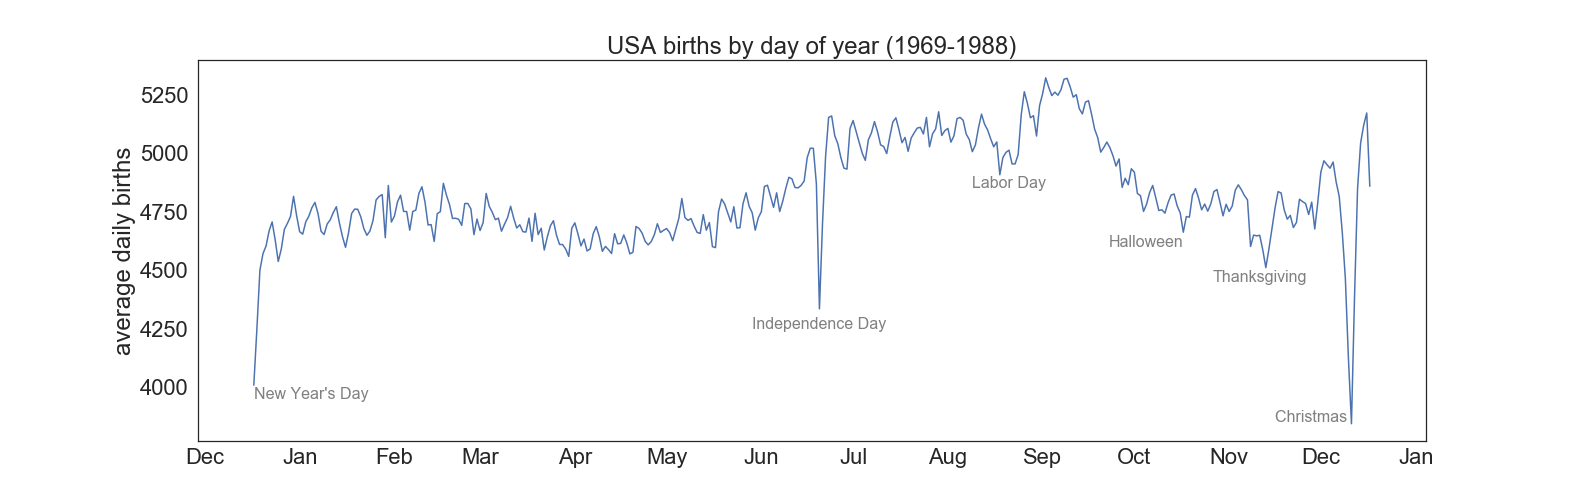

In [75]:
# to see contents of a saved image
from IPython.display import Image
Image('my_figure.png')